# DSCI 619 Deep Learning
# Week 5: Build Recurrent Neural Network (RNN) Models




**Objectives**

After you complete this module, students will be able to:


+ Understand the recurrent neural network (RNN)
+ Know the Gated Recurrent Unit (GRU)
+ Understand Long Short-Term Memory layer.
+ Use embedding layer to convert text to numerical values.
+ Perform the sentiment analysis using GRU
+ Apply LSTM to perform text classification

Recurrent Neural Network (CNN) is a very popular model in deep learning. First, we cover the general RNN model.  Next, we will cover the LSTM and GRU layers. Third, we will show how to use RNN models to perform sentiment analysis and text classification.  

**Readings**

+ Recurrent Neural Network (RNN)(https://d2l.ai/chapter_recurrent-neural-networks/index.html)
+ Recurrent Neural Networks (RNN) with Keras (https://www.tensorflow.org/guide/keras/rnn)



# Week 5: Build Recurrent Neural Network (RNN) Models

http://d2l.ai/chapter_recurrent-neural-networks/index.html


## Short Introduction to RNN

We have covered how to perform regression and classification using neural networks on the tabular data, such as the Excel workbook and images. There is a key assumption in these data. They are independent. For example, the 10th observation is independent of the 100th observation. We use feedforward neural networks to model them.

There are problems that the independence assumption is not valid anymore. For example, we want to forecast the missing word for the following sentence: 

It is raining now. Please bring your $\underline {\ \ \ \ \ \ \  }$.

By common sense, the missing word probably is "umbrella" since it depends on the context (Previous words). Therefore, we need another type of neural network that has a backward connection between hidden layers. Then, they can have some memory in them to model the dependence in the data. These neural networks are called Recurrent Neural Networks (RNN). We can use RNN models for text data and speech data. 

Typically RNN model has the following network architecture: 

<img src = "RNN1.jpg">

Source: https://en.wikipedia.org/wiki/Recurrent_neural_network

Note here:

+ $x_t$ denotes the input vector, which depends on time t.
+ $h_t$ is the hidden layer vector, which can memorize some historical data.
+ $o_t$ is the output vector.

We use the default Relu (https://www.tensorflow.org/api_docs/python/tf/nn/relu) activation function a lot before. When we perform classification, we use sigmoid (https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) for binary classification and softmax (https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) for multiple 
classification.

In RNN, we use the following three functions: Relu, sigmoid and Hyperbolic tangent function(https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh).

The RNN is trained by backpropagation through time. Then the RNN is unfolded into a forward feed net with multiple layers. When the gradient is passed back through many time steps, it tends to grow or vanish because the gradients are multiplied many times. It is called the exploding and vanishing gradients problem. ( https://en.wikipedia.org/wiki/Vanishing_gradient_problem).   Hochreiter & Schmidhuber proposed the Long Short-Term Memory (LSTM) to address it in 2009. 

## Long Short-Term Memory (LSTM)


A multi-layer long short-term memory (LSTM) RNN can be applied to an input sequence. LSTM has three gates that are input, output, and forget gates.

For each element in the input sequence, each layer computes the following function:

$$i_t =\sigma( W_{ii}x_t+b_{ii}+W_{hi}h_{t-1}+b_{hi})$$
$$f_t =\sigma (W_{if}x_t+b_{if}+W_{hf}h){t-1}+b_{hf})$$
$$g_t =\tanh(W_{ig}x_t+b_{ig}+W_{hg}h_{t-1}+b_{hg})$$
$$o_t =\sigma (W_{io}x_t+b_{io}+W_{ho}h){t-1}+b_{ho})$$
$$c_t=f_t \circ c_{t-1}+i_t \circ g_t$$
$$h_t=o_t\circ\tanh(c_t)$$

Where:

+ $h_t$ is the hidden state at time $t$
+ $c_t$ is the cell state at time $t$
+ $i_t$ is the input gate
+ $f_t$ is the forget gate
+ $g_t$ is the cell 
+ $o_t$ is the ouput gate
+ $\circ$ is the Hadamard product
+$\sigma$ is the sigmoid funciton.

<center> source: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html </center>

By the equations above, **LSTM will generate three values (output, hidden, and cell)**. LSTMs are used in modeling tasks related to sequences. They can perform predictions based on its history. We often use LSTMs in NLP, such as machine translation and sentiment analysis. 

## Gated Recurrent Unit (GRU)

LSTM has many parameters to estimate. Kyunghyun Cho et al. introduced the gated recurrent unit(GRU) (https://en.wikipedia.org/wiki/Gated_recurrent_unit) in 2014. GRUs have a few parameters than LSTMs.

For each element in the input sequence, each layer computes the following function:

$$r_t=\sigma(W_{ir}x_t+b_{ir}+W_{hr}h_{(t-1)}+b_{hr})$$
$$z_t=\sigma(W_{iz}x_t+b_{iz}+W_{hz}h_{(t-1)}+b_{hz})$$
$$n_t=\tanh(W_{in}x_t+b_{in}+r_t*(W_{hn}h_{(t-1)}+b_{hn}))$$
$$h_t=(1-z_t)*n_t+z_t*h_{(t-1)}$$

where
+ $h_t$ is the hidden state at time $t$
+ $x_t$ is the input at time $t$
+ $h_{(t-1)}$ is the hidden state of the layer at time $t-1$
+ $r_t$ is the reset gate
+ $z_t$ is the update gate
+ $n_t$ is the new gate

<center> source: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html?highlight=gru#torch.nn.GRU </center>


Chung, Gulcehre, Cho and Bengio published a paper, "Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling".

In this paper we compare different types of recurrent units in recurrent neural networks (RNNs). Especially, we focus on more sophisticated units that implement a gating mechanism, such as a long short-term memory (LSTM) unit and a recently proposed gated recurrent unit (GRU). We evaluate these recurrent units on the tasks of polyphonic music modeling and speech signal modeling. Our experiments revealed that these advanced recurrent units are indeed better than more traditional recurrent units such as tanh units. Also, we found GRU to be comparable to LSTM.

<center> source https://arxiv.org/pdf/1412.3555.pdf  </center>

# Project of Text Classification Using TensorFlow


Let’s look at a real-world project of text classification using TensorFlow. We will cover how to perform text classification using RNN. (see https://www.tensorflow.org/tutorials/text/text_classification_rnn). We work on the large movie review dataset ( see http://ai.stanford.edu/~amaas/data/sentiment/). It is a binary sentiment classification with 50,000 movie reviews. This dataset has the following two columns:

+ **review**: Text
+ **sentiment**: positive or negative 

Our goal is to forecast the **sentiment** based on the **review**. 

## Load and Clean the Data

First, we load all the libraries for this sentiment analysis. 

In [1]:
import pandas as pd
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Next, let's load the data into memory

In [2]:
review_file_path ='C:\\Users\\liuyu\\OneDrive\\OneDrive - Maryville University\\DSCI 619\\Modules\\WK5\\IMDB Dataset.csv'
review_csv_ds = pd.read_csv(review_file_path)

In [3]:
review_csv_ds.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


We need to convert the label of sentiment to a numerical value using label encoding.

In [4]:
le = preprocessing.LabelEncoder()
review_csv_ds['label'] = le.fit_transform(review_csv_ds['sentiment'])
review_csv_ds.label.value_counts()

0    25000
1    25000
Name: label, dtype: int64

It is a balanced binary classification with 50% positive cases and 50% negative cases.


Next, we need to clean the texts. We use the regular expressions (see https://docs.python.org/3/library/re.html). It is a powerful tool for us to clean texts using very compact codes. We perform the following tasks to clean the texts:

+ Remove all special characters, punctuation and spaces
+ Remove special characters, <br />
+ Remove all words with length <=2


In [5]:
# Remove all special characters, punctuation and spaces
review_csv_ds['review'] = review_csv_ds['review'].apply(lambda x: re.sub(r'[^A-Za-z0-9]+',' ',x))
# Replace special characters,<br />,  in the file
review_csv_ds['review'] = review_csv_ds['review'].apply(lambda x: re.sub(r"<br />", " ", x))
# Remove length <=2
review_csv_ds['review'] = review_csv_ds['review'].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))

In [6]:
review_csv_ds.head()

,review,sentiment,label
0,One the other reviewers has mentioned that af...,positive,1
1,wonderful little production The filming tec...,positive,1
2,thought this was wonderful way spend time ...,positive,1
3,Basically there family where little boy Jak...,negative,0
4,Petter Mattei Love the Time Money visuall...,positive,1


## Split the Data into Training and Test Data 




In [7]:
X = review_csv_ds['review'].values
y = review_csv_ds['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.5)

In [8]:
print(f'X_train size  ={X_train.shape}; X_test size  ={X_test.shape}')

X_train size  =(40000,); X_test size  =(10000,)


Next, we need to convert the text to numerical values using TextVectorization. (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization). It transforms a batch of strings into  a list of token indices.


In [9]:
# Specify the vocab size
VOCAB_SIZE = 1000
# Perform textvectorization
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)

# Fits the state of the preprocessing layer to the dataset.
encoder.adapt(X_train)

In [10]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'this', 'that', 'was', 'movie', 'for',
       'with', 'but', 'film', 'you', 'not', 'are', 'his', 'have', 'one',
       'all', 'they'], dtype='<U14')

## Create the RNN Model

Our network has several layers:
+ The first layer is the embedding layer which converts words to a vector by keeping their "meaning". Similar words, such as cats and dogs, are close to each other. Please see https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
+ The second layer is a GRU layer. (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
+ The third layer is the LSTM to capture the "context" of the words/tokens (see https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
+ The last two layers is a classifier for binary classification. 

In [11]:
model = tf.keras.Sequential([
    # Convert review text to indices
    encoder, 
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    # 
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # Binary classifier
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

## Configure the Model

We use the binary cross-entropy with logits = True since the activation function in the last layer is identity (Not sigmoid). We also specify the optimizer and metrics. 

In [12]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Train the Model

In [13]:
%%time
history = model.fit(x=X_train,y=y_train,batch_size= 32,epochs=5,
          validation_data=(X_test,y_test), verbose= 1
          )

Epoch 1/5
1250/1250 [==============================] - 1968s 2s/step - loss: 0.4354 - accuracy: 0.7608 - val_loss: 0.3224 - val_accuracy: 0.8626
Epoch 2/5
1250/1250 [==============================] - 1754s 1s/step - loss: 0.3123 - accuracy: 0.8637 - val_loss: 0.3149 - val_accuracy: 0.8711
Epoch 3/5
1250/1250 [==============================] - 1735s 1s/step - loss: 0.3020 - accuracy: 0.8687 - val_loss: 0.3059 - val_accuracy: 0.8674
Epoch 4/5
1250/1250 [==============================] - 1714s 1s/step - loss: 0.2952 - accuracy: 0.8714 - val_loss: 0.3271 - val_accuracy: 0.8428
Epoch 5/5
1250/1250 [==============================] - 1699s 1s/step - loss: 0.2933 - accuracy: 0.8718 - val_loss: 0.3176 - val_accuracy: 0.8724
Wall time: 2h 28min 12s


Let's look at the model architecture.

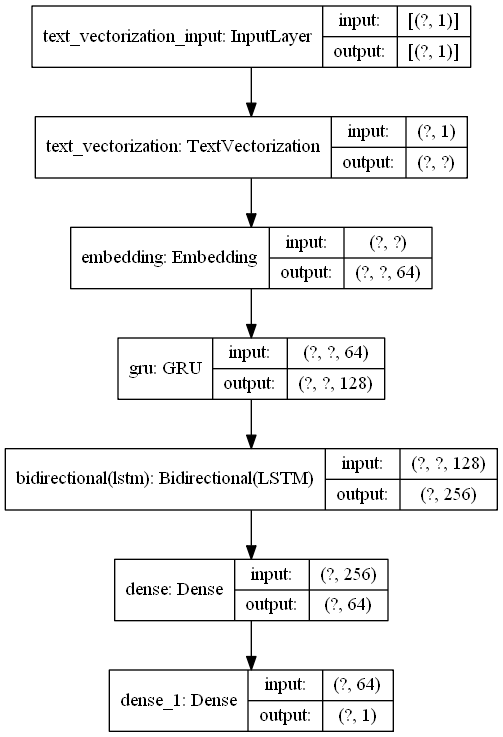

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Model Diagnostics

Let's look at the in-sample fit and out-of-sample fit.

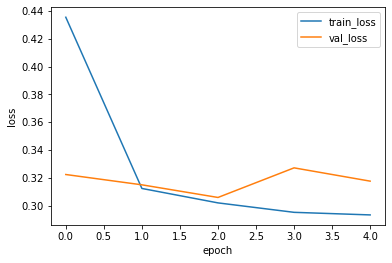

In [15]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', 'val_loss'])

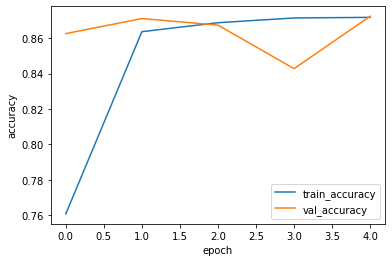

In [16]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

## Evaluate the Model on the Test Dataset

Forecast the label.

In [17]:
# the cutoff probability is 50%
y_pred = (model.predict(X_test)> 0.5).astype(int)


We get the confusion matrix.

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4343,  657],
       [ 619, 4381]], dtype=int64)

Print out the classification report

In [19]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      5000
    positive       0.87      0.88      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



The accuracy and f1-score is larger than 85%. It is a decent model.